# Levantamos la data

In [16]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

In [17]:
# ES UN DATASET DE JUGUETES 
X, y = load_diabetes(return_X_y=True)
# deberia haberlo partido en 3: train, development y test y el test no tocarlo
X_train, X_test, y_train, y_test = train_test_split(X, y)

X.shape

(442, 10)

# Grid search sencillo

In [3]:
import math

experiment_results = []

# Exploramos el espacio de búsqueda con estos 2 for
for max_depth in [3, 5, 10, None]:
    for min_samples_split in [2, 10, 30, 100]:
        # Instanciamos el modelo
        model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split)
        
        # Lo ajustamos
        model.fit(X_train, y_train)
        
        # Registramos el resultado del experimento
        experiment_results.append(
            {
                'max_depth': max_depth, 'min_samples_split': min_samples_split,
                'model_complexity': model.get_n_leaves(), 
                'tr_err': math.sqrt(mean_squared_error(y_train, model.predict(X_train))),
                'te_err': math.sqrt(mean_squared_error(y_test, model.predict(X_test)))
            }
        )
        # si tarda mucho en correr conviene tamb guardarse el modelo eso se
        #appendea en experiment_results como 'model'=model

In [4]:
import pandas as pd

# Convertimos los resultados en un dataframe
experiment_results = pd.DataFrame(experiment_results)

experiment_results

,max_depth,min_samples_split,model_complexity,tr_err,te_err
0,3.0,2,8,52.190434,63.751806
1,3.0,10,8,52.190434,63.751806
2,3.0,30,8,52.190434,63.751806
3,3.0,100,5,55.539001,65.443527
4,5.0,2,27,42.199754,62.641400
5,5.0,10,23,42.743359,62.013585
6,5.0,30,16,47.014938,63.663344
7,5.0,100,7,54.853998,66.323600
8,10.0,2,191,13.791409,76.197340
9,10.0,10,64,29.522484,69.038794


## Visualizamos un scatter plot de los modelos que probamos

Cada bolita es un modelo

* Eje x: training error
* Eje y: test error
* Color: model complexity
* A la izquierda estan los modelos que ajustaron perfecto el trainingset, de complejidad alta
* A la derecha los de complejidad mas baja que no ajustaron perfecto al trainingset

Text(0.5, 1.0, 'training vs test error, color = model complexity')

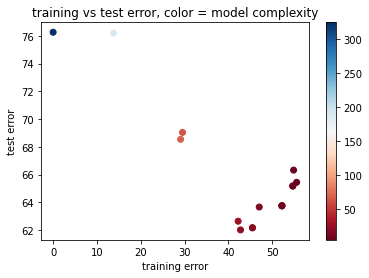

In [5]:
import matplotlib.pyplot as plt

plt.set_cmap('RdBu')
ax = plt.scatter(experiment_results.tr_err, experiment_results.te_err, c=experiment_results.model_complexity)
plt.colorbar(ax)
plt.xlabel('training error')
plt.ylabel('test error')
plt.title('training vs test error, color = model complexity')

* El cuadrante inferior derecho son los modelos que tienen mucho error en training. 
* El cuadrante superior izquierdo es cuando tengo muy poco error en training y mucho error en test: estoy overfitting. Sube muchisimo el error en testing. Esto aparte corresponde a la model complexity altisima. 

El modo de hacer grid search que acabamos de ver conviene si tengo 2 variables. Si ya tengo 3, 4, 5 variables se hace tedioso tener 5 for anidados. Ya hay codigo que hace eso en scikit learn. 

# Grid search usando scikit learn

Cuando tenemos mas hyperparametros, ese for anidado se puede tornar incómodo.

En lugar de escribirlo, podemos utilizar ParameterGrid de scikit-learn

In [6]:
from sklearn.model_selection import ParameterGrid

grid = ParameterGrid(
    {
        'max_depth': [3, 5, 10, None], # prueba con estos valores de max depth
        'min_samples_split': [2, 10, 30, 100] # prueba estos min sample split 
    }
)
list(grid)
#hace la grilla automaticamente

[{'max_depth': 3, 'min_samples_split': 2},
 {'max_depth': 3, 'min_samples_split': 10},
 {'max_depth': 3, 'min_samples_split': 30},
 {'max_depth': 3, 'min_samples_split': 100},
 {'max_depth': 5, 'min_samples_split': 2},
 {'max_depth': 5, 'min_samples_split': 10},
 {'max_depth': 5, 'min_samples_split': 30},
 {'max_depth': 5, 'min_samples_split': 100},
 {'max_depth': 10, 'min_samples_split': 2},
 {'max_depth': 10, 'min_samples_split': 10},
 {'max_depth': 10, 'min_samples_split': 30},
 {'max_depth': 10, 'min_samples_split': 100},
 {'max_depth': None, 'min_samples_split': 2},
 {'max_depth': None, 'min_samples_split': 10},
 {'max_depth': None, 'min_samples_split': 30},
 {'max_depth': None, 'min_samples_split': 100}]

In [7]:
def evaluate_model(params):
    # Notar que esta funcion es escencialmente el cuerpo del for anidado de antes
    model = DecisionTreeRegressor(max_depth=params['max_depth'], min_samples_split=params['min_samples_split'])
    model.fit(X_train, y_train)
    return {
        'max_depth': params['max_depth'], 'min_samples_split': params['min_samples_split'],
        'model_complexity': model.get_n_leaves(), 
        'tr_err': math.sqrt(mean_squared_error(y_train, model.predict(X_train))),
        'te_err': math.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    }

experiment_results = []
for params in grid:
    experiment_results.append(evaluate_model(params))
    

In [8]:
pd.DataFrame(experiment_results)

,max_depth,min_samples_split,model_complexity,tr_err,te_err
0,3.0,2,8,52.190434,63.751806
1,3.0,10,8,52.190434,63.751806
2,3.0,30,8,52.190434,63.751806
3,3.0,100,5,55.539001,65.443527
4,5.0,2,27,42.199754,62.641400
5,5.0,10,23,42.743359,62.013585
6,5.0,30,16,47.014938,63.663344
7,5.0,100,7,54.853998,66.323600
8,10.0,2,191,13.791409,75.624536
9,10.0,10,64,29.522484,69.047794


Si el metodo de scikit learn y el a mano no dan exactamente igual es porque el decision tree en algun momento toma una decision aleatoria y no usamos el mismo random seed 


In [ ]:
#DecisionTreeRegressor? 
#efectivamente tiene un parametro que se llama random state.
# si vuelvo a correr vemos que el data frame con los resultados cambia un poco. Eso es por lo random

# Hyperopt

Ahora vamos a ver como podemos utilizar hyperopt

Hyperopt es uno de los paquetes que hace Secuential model based optimization (SMBO).

In [18]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

def objective(params):
    # Tenemos que hacer una adaptacion a nuestra funcion evaluate_model para que funcione con hyperopt
    if params['min_samples_split'] is not None:
        params['min_samples_split'] = int(params['min_samples_split'])
        
    res = evaluate_model(params) # aca entran  los datos del data set 
    
    res['loss'] = res['te_err'] # Esta loss es la que hyperopt intenta minimizar
    res['status'] = STATUS_OK # Asi le decimos a hyperopt que el experimento salio bien, lo necesita hyperopt. En status podemos decirle que si el modelo tarda mas de 5 minutos en entrenar que lo abandonemos (eligiendo otro status que status_ok). 
    return res 

# Este espacio es una copia del grid search, no estamos dando mucha información en este prior
# esto es un muy mal uso de hyperopt (le doy 3 valores que elijo). solo por fines didacticos.
# none es que use la max_depth que quiera
# hp.choice es una primitiva. hyperopt hace una exploracion bayesiana (aleatoria?) del espacio
hyperparameter_space = {
    'max_depth': hp.choice('max_depth', [3, 5, 10, None]),
    'min_samples_split': hp.choice('min_samples_split', [2, 10, 30, 100]),
}
#grilla de 16 combinaciones. muy pavote para hyperopt

trials = Trials() # instancia trials que guarda registro de todas las cosas que hizo
fmin(
    objective,
    space=hyperparameter_space, # espacio de hiperparametros
    algo=tpe.suggest,
    max_evals=16,
    trials=trials
); # minimiza objetivo

100%|██████████| 16/16 [00:00<00:00, 249.03it/s, best loss: 55.60523009408178]


La funcion objective tiene que devolver ciertas cosas en especial para que hyperopt funcione. Devuelve un diccionario donde si o si tiene que estar la loss. Y la loss tiene que ser algo que tengo que minimizar. Aca es el error en testing (development in fact). Si partimos en 3 el dataset podemos probar si realmente overfitteamos el development set. 





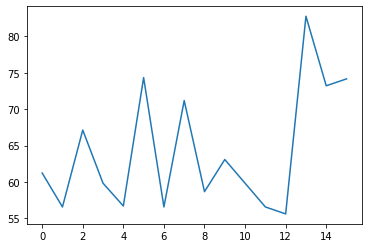

In [19]:
# El espacio de búsqueda es muy pequeño, no vamos a ver una tendencia aqui
plt.plot(trials.losses())

In [20]:
experiment_results = pd.DataFrame(trials.results)
experiment_results
#aca podemos ver cosas repetidas ya que es estocastico (puede repetir)

,max_depth,min_samples_split,model_complexity,tr_err,te_err,loss,status
0,5.0,30,14,49.758613,61.220865,61.220865,ok
1,3.0,30,7,55.668768,56.562870,56.562870,ok
2,5.0,2,28,45.463046,67.125166,67.125166,ok
3,5.0,100,7,55.710352,59.820332,59.820332,ok
4,3.0,2,8,55.071239,56.693703,56.693703,ok
5,NaN,10,67,29.772395,74.330584,74.330584,ok
6,3.0,30,7,55.668768,56.562870,56.562870,ok
7,10.0,10,64,30.329876,71.174762,71.174762,ok
8,3.0,30,7,55.668768,58.662810,58.662810,ok
9,5.0,10,20,46.655155,63.076368,63.076368,ok


### Apartado: distribuciones de hyperopt

[Acá](https://github.com/hyperopt/hyperopt/wiki/FMin#21-parameter-expressions) podes ver todas las distribuciones que tenemos en hyperopt

En este ejemplo vamos a utilizar qloguniform que es una uniforme cuantizada, que pone más densidad en los números bajos

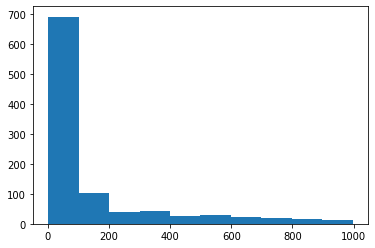

In [21]:
import numpy as np
import hyperopt.pyll.stochastic
# esto es para mostrar como se ve un loguniform
variable = hp.qloguniform('test', low=np.log(1), high=np.log(1000), q=1)
samples = [hyperopt.pyll.stochastic.sample(variable) for i in range(1000)]
plt.hist(samples);
#sampleo muchas veces valores chiquitos que valores grandes
#pero si un valor grande da bien, se va a ir por ese camino. la exploracion se va actualizando (los posteriors de bayes)

In [22]:
# Este espacio es mucho mas rico
hyperparameter_space = {
    'max_depth': hp.qloguniform('max_depth', low=np.log(1), high=np.log(100), q=1),
    'min_samples_split': hp.qloguniform('min_samples_split', low=np.log(2), high=np.log(500), q=1),
}
# el max depth es cualquier numero entre 1 y 100 con loguniform
# q es la cuantizacion, aca esta cuatizado de 1 en 1
trials = Trials()
fmin(
    objective,
    space=hyperparameter_space,
    algo=tpe.suggest,
    max_evals=200,
    trials=trials
);

100%|██████████| 200/200 [00:05<00:00, 37.41it/s, best loss: 55.58479003721599]


Podemos graficar la loss (test error) de cada trial. 

De este grafico se puede ver que encuentra una configuración buena muy rapidamente y luego se queda probando otras cosas hasta cumplir los 200 experimentos

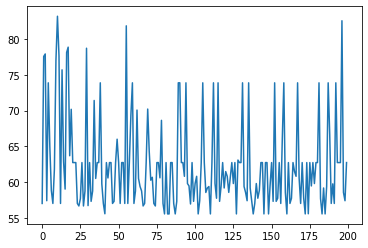

In [23]:
plt.plot(trials.losses())
#bastante ruidoso. Eventualmente vuelve  a la solucion que habia encontrado que andaba bien

In [24]:
experiment_results = pd.DataFrame(trials.results)
experiment_results

,max_depth,min_samples_split,model_complexity,tr_err,te_err,loss,status
0,2.0,3,4,59.133294,57.044334,57.044334,ok
1,99.0,6,117,16.765689,77.540531,77.540531,ok
2,8.0,3,90,29.642012,77.890467,77.890467,ok
3,10.0,61,11,52.215394,57.424447,57.424447,ok
4,4.0,379,1,78.034675,73.866824,73.866824,ok
...,...,...,...,...,...,...,...
195,18.0,273,2,65.503161,62.744421,62.744421,ok
196,31.0,2,322,0.000000,82.521523,82.521523,ok
197,30.0,72,10,52.892784,58.576117,58.576117,ok
198,64.0,59,11,52.215394,57.424447,57.424447,ok


Si observamos el model complexity, podemos ver que no exploró muchos modelos complejos. Esto podemos atribuirlo a que los modelos complejos son muy suceptibles a overfitting y generan una loss mas alta

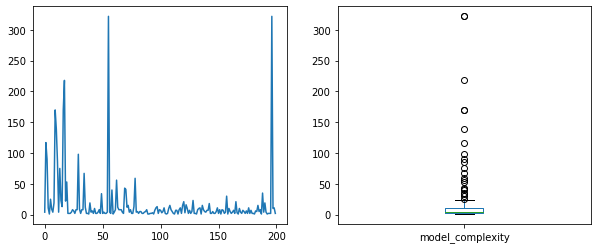

In [25]:
plt.figure(figsize=(10,4))
plt.subplot(121)
experiment_results.model_complexity.plot()
plt.subplot(122)
experiment_results.model_complexity.plot.box()
#vemos como evoluciona el model complexity en el tiempo
#prueba algunas cosas con model complexity alto pero se da cuenta que esta overfitteando y lo abandona.

Del boxplot de la distribucion de model complexity vemos que la mayoria tiene model complexity baja y hay algunos outliers con model complexity alta. Esto nos da la pista que SMBO hace una exploracion mucho mas inteligente en el espacio de hyperparametros. 

Text(0, 0.5, 'test error')

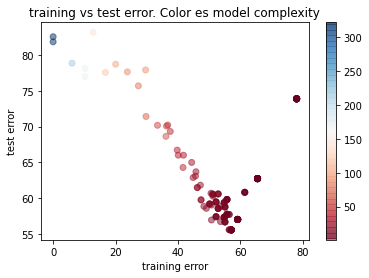

In [26]:
ax = plt.scatter(
    experiment_results.tr_err, experiment_results.te_err, c=experiment_results.model_complexity, alpha=0.5
)
plt.colorbar(ax)
plt.title('training vs test error. Color es model complexity')
plt.xlabel('training error')
plt.ylabel('test error')

Se mantiene la tendencia que habiamos visto antes. Cuando tenemos muy bajo el error en training , el error en testing es enorme (esquina superior izquierda, es overfitting). Sigue bajando el error hasta llega a error en training igual a 60 y despues empieza a subir los dos errores (training y validacion), lo que se ve en la esquina superior derecha. Los dos puntos mas a la derecha donde el error en training y development son altos es underfitting. Entre error en training entre 40 y 60 hay un cluster de modelos que estan balanceados. 

## **Otro ejemplo de hyperopt**

In [12]:
#minuto 2:27 de clase teorica 2 
from sklearn import datasets
#dataset de juguete 
iris= datasets.load_iris()
X=iris.data
y=iris.target

from sklearn.neighbors import KNeighborsClassifier
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score
#es la funcion que quiero optimizar
#recibe los hiperparametros y devuelve el error de crossvalidation (que es una metrica del error en validation)
# crossvalidation: esta partiendo el dataset en muchos pedazos y haciendo training y development muchas veces (ver nota en el docs de esto)
def hyperopt_train_test(params):
  clf=KNeighborsClassifier(**params) #instancia un clasificador que no es decision tree ni regresion logistica
  return cross_val_score(clf, X, y).mean()

# aca defino el espacio de hyperparametros
# n_neighbors es un hiperparametro de Knn
space4knn = {'n_neighbors': hp.choice('n_neighbors',range(1,100))}
# hp.choice significa que elija al azar alguno de 1 a 100.
# dentro de hp.choice le estamos metiendo nuestra creencia a priori de como se comporta nuestro hiperparametro (el prior bayesiano)
# puedo cambiar hp.choice por otras funciones que le dicen que pruebe valores grandes pero que crees a priori que el valor es chico. Eso seria un prior mas informativo. 
#funcion hp.loguniform: proba algunos valores grandes aunque creo que es chico, pero si ves que por ahi anda bien, segui por ahi. le da mas pesos a los valores chicos que los grandes
#el prior hp.choice es el menos informativo (es al azar).

# f es la funcion que vamos a optimizar. Recibe los hiperparametros, calcula el accuracy en validation/development
# devuelve lo que necesita hyperopt para funcionar:  da la loss que la calcula como menos la accuracy
def f(params):
  acc=hyperopt_train_test(params)
  return {'loss':-acc,'status': STATUS_OK}
# en vez de poner la accuracy en validation puedo armarme una metrica que incluya accuracy en training y validation y que evalue si estoy overfitteando
trials = Trials()
# hace 100 intentos y se queda con el mejor
#tpe.suggest es el que hace la funcion de adquisicion (ver apuntes)
best= fmin(f,space4knn, algo=tpe.suggest, max_evals=100, trials=trials)

100%|██████████| 100/100 [00:02<00:00, 48.09it/s, best loss: -0.9800000000000001]


In [13]:
best

{'n_neighbors': 11}

## **Auto ML en sklearn**

In [18]:
!pip install --upgrade scikit-learn

     |████████████████████████████████| 6.8MB 4.9MB/s 
ERROR: auto-sklearn 0.11.1 has requirement scikit-learn<0.23,>=0.22.0, but you'll have scikit-learn 0.23.2 which is incompatible.
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [1]:
!apt-get install swig -y
!pip install Cython numpy

# sometimes you have to run the next command twice on colab
# I haven't figured out why
!pip install auto-sklearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
swig is already the newest version (3.0.12-1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
     |████████████████████████████████| 7.1MB 5.3MB/s 
  Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


In [2]:
# ignore some annoying warnings for demonstrating auto-sklearn 
# shouldn't be done in real production
import numpy as np
np.warnings.filterwarnings('ignore')

In [13]:
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics

# Load data
X, y = sklearn.datasets.load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = \
sklearn.model_selection.train_test_split(X, y, random_state=1)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

In [6]:
import autosklearn.classification

# configure auto-sklearn
#instancio
automl = autosklearn.classification.AutoSklearnClassifier(
          time_left_for_this_task=120, # run auto-sklearn for at most 2min
          per_run_time_limit=30, # spend at most 30 sec for each model training
          )

# train model(s)
automl.fit(X_train, y_train)

# evaluate
y_hat = automl.predict(X_test)
test_acc = sklearn.metrics.accuracy_score(y_test, y_hat)
print("Test Accuracy score {0}".format(test_acc))

Test Accuracy score 0.9888888888888889


In [4]:
import autosklearn.classification
automl = autosklearn.classification.AutoSklearnClassifier()
automl.fit(X_train, y_train)
y_hat=automl.predict(X_test)
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))

KeyboardInterrupt: ignored